In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: AC
Digite os 2 primeiros digitos do shapefile: 12


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
ID            900 non-null int64
CD_GEOCODI    900 non-null object
TIPO          900 non-null object
CD_GEOCODB    0 non-null object
NM_BAIRRO     0 non-null object
CD_GEOCODS    900 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    900 non-null object
NM_DISTRIT    900 non-null object
CD_GEOCODM    900 non-null object
NM_MUNICIP    900 non-null object
NM_MICRO      900 non-null object
NM_MESO       900 non-null object
geometry      900 non-null object
dtypes: int64(1), object(13)
memory usage: 98.5+ KB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(874, 13)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,120001305000001,282,957,"3,39","2,6","1368,91","37074622,68","1601,8","43033612,85","758,58","13786625,7","1249,62","22114423,28"
1,120001305000002,342,1203,"3,52","2,63","737,47","820504,57","805,8","841534,36","407,43","510601,28","716,42","676770,34"
2,120001305000003,482,1700,"3,53","2,88","606,4","1108707,24","767,15","1279744,31","411,93","757913,63","689,39","1077559,69"
3,120001305000004,53,182,"3,43","2,48","758,51","349158,22","837,52","318721,06","426,47","278588,4","684,34","270475,43"
4,120001305000005,96,305,"3,18","2,32","689,61",332081,"735,59","320270,31","446,56","833770,63","748,21","1173535,4"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 874 entries, 0 to 873
Data columns (total 26 columns):
ID            874 non-null int64
CD_GEOCODI    874 non-null int64
TIPO          874 non-null object
CD_GEOCODB    0 non-null object
NM_BAIRRO     0 non-null object
CD_GEOCODS    874 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    874 non-null object
NM_DISTRIT    874 non-null object
CD_GEOCODM    874 non-null object
NM_MUNICIP    874 non-null object
NM_MICRO      874 non-null object
NM_MESO       874 non-null object
geometry      874 non-null object
V001          874 non-null int64
V002          874 non-null int64
V003          874 non-null object
V004          874 non-null object
V005          874 non-null object
V006          874 non-null object
V007          871 non-null object
V008          871 non-null object
V009          874 non-null object
V010          874 non-null object
V011          873 non-null object
V012          873 non-null object
dtypes: int64

In [11]:
del gdf
del dados

Text(0.5,1,'AC')

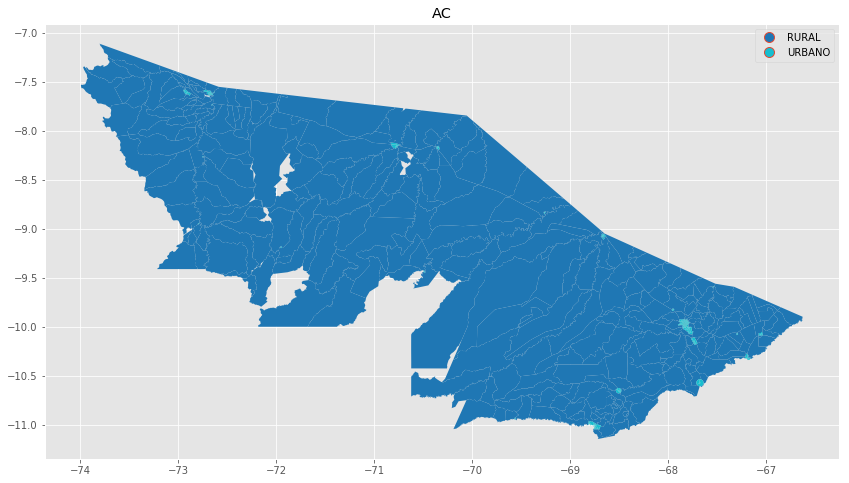

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
5506,Marechal Thaumaturgo,AC,1.101,1200351.0,POLYGON ((-72.79502342473249 -8.94675909098929...,1.101000
5535,AcrelÃ¢ndia,AC,8.012,1200013.0,POLYGON ((-67.05096944059123 -10.0615149881092...,8.011491
5536,Assis Brasil,AC,2.160,1200054.0,POLYGON ((-69.56807518651961 -10.9426645022803...,2.159861
5537,BrasilÃ©ia,AC,6.471,1200104.0,(POLYGON ((-68.75662096536401 -11.010081687328...,6.471329
5538,Bujari,AC,3.215,1200138.0,POLYGON ((-67.95163237417336 -9.81844972349411...,3.214846


In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22 entries, 5506 to 5555
Data columns (total 6 columns):
Municipio     22 non-null object
UF            22 non-null object
Area_Urb      22 non-null float64
CD_GEOCODM    22 non-null int64
geometry      22 non-null object
Area          22 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no AC')

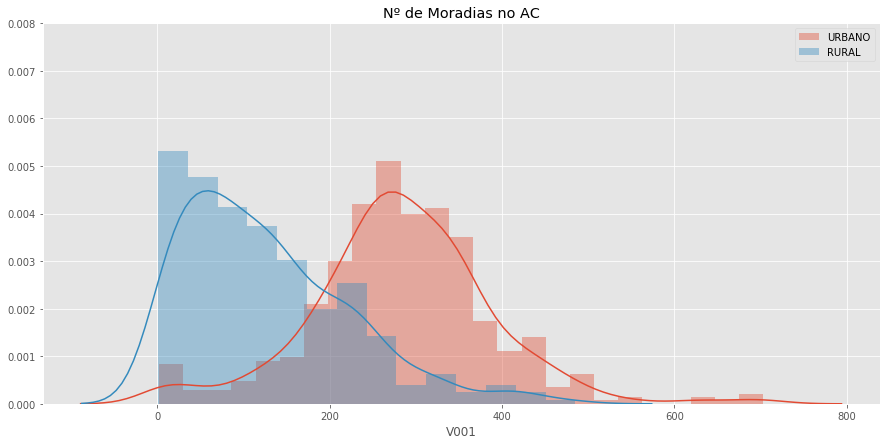

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    364.000000
mean     126.653846
std       96.238088
min        1.000000
25%       53.000000
50%      106.000000
75%      185.000000
max      485.000000
Name: V001, dtype: float64
URBANO 
 count    510.000000
mean     283.417647
std      105.413248
min        2.000000
25%      228.000000
50%      281.000000
75%      341.500000
max      703.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

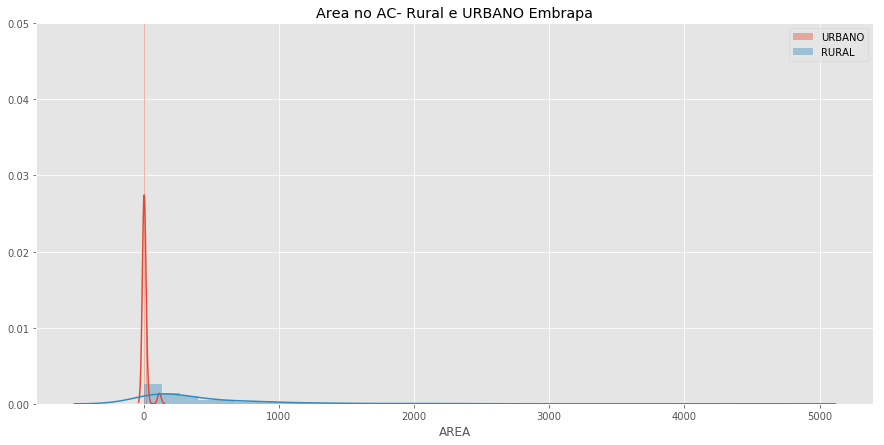

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [23]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

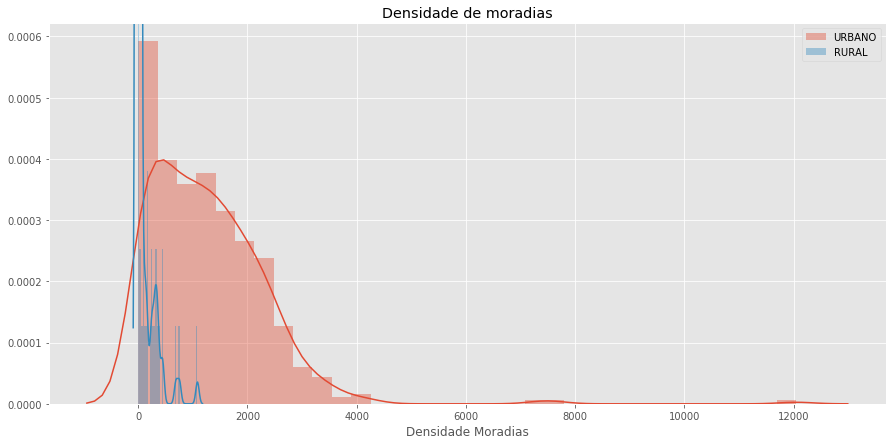

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [25]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count     364.000000
mean       22.846990
std        99.867763
min         0.002938
25%         0.123248
50%         0.404697
75%         1.181353
max      1084.115670
Name: Densidade Moradias, dtype: float64
URBANO 
 count      510.000000
mean      1263.347752
std       1092.252752
min          0.191550
25%        443.993385
50%       1109.922004
75%       1878.365956
max      12051.975139
Name: Densidade Moradias, dtype: float64


In [26]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,16.00000,1.600000e+01,16.000000,16.000000,16.000000,16.000000
mean,606.87500,1.200494e+14,182.750000,683.500000,0.486321,422.882518
std,331.00793,2.733676e+10,117.044436,432.413382,0.338640,230.859479
min,9.00000,1.200013e+14,17.000000,54.000000,0.060613,235.820084
25%,496.75000,1.200352e+14,88.750000,329.000000,0.222514,288.062310
50%,697.50000,1.200401e+14,150.000000,556.500000,0.418569,334.717789
75%,889.25000,1.200807e+14,276.250000,1037.250000,0.741001,441.189745
max,898.00000,1.200807e+14,397.000000,1464.000000,1.107453,1084.115670


## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     22.000000
mean      10.225793
std       24.343074
min        1.101000
25%        1.567763
50%        4.320623
75%        7.236539
max      116.807435
Name: Area, dtype: float64
RURAL 
 count     364.000000
mean      430.810280
std       555.540779
min         0.060613
25%        95.854229
50%       249.928142
75%       581.591711
max      4603.480227
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

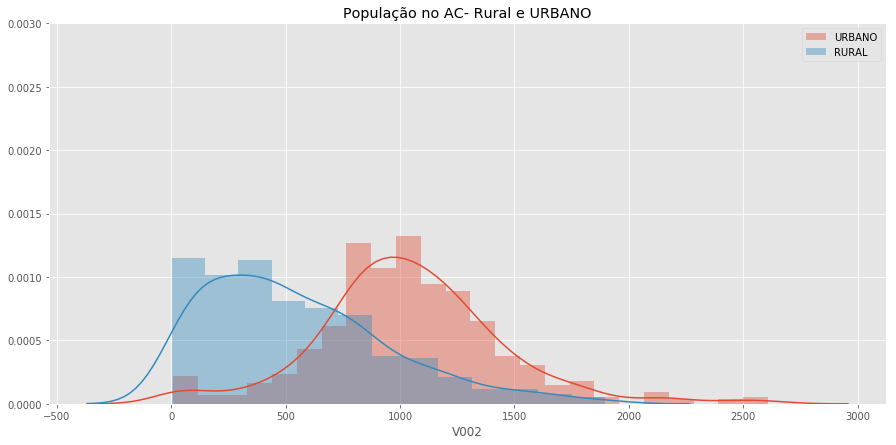

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count     364.00000
mean      546.93956
std       401.08668
min         2.00000
25%       229.75000
50%       464.50000
75%       765.75000
max      1896.00000
Name: V002, dtype: float64
URBANO 
 count     510.000000
mean     1039.860784
std       404.989920
min         7.000000
25%       817.250000
50%      1018.000000
75%      1252.750000
max      2608.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [30]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [31]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [36]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
if scrcu['ID'].count()>0:
    plt.style.use('ggplot')
    scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
    plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


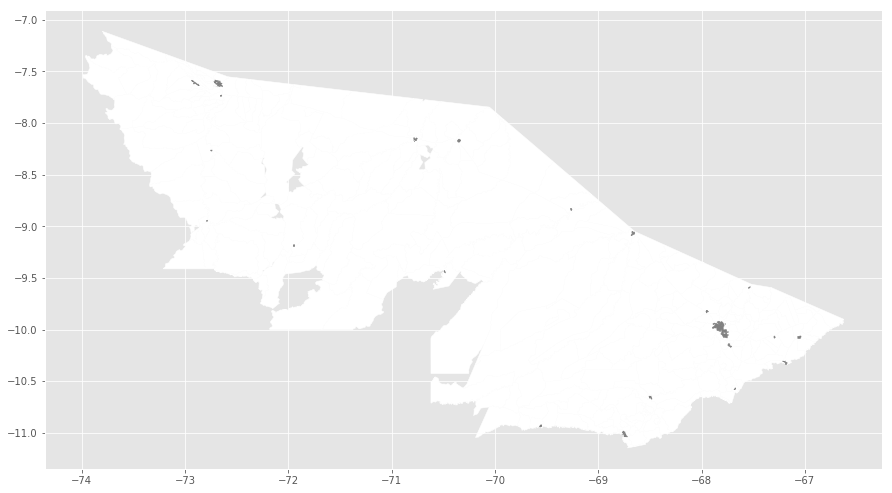

In [38]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [39]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [40]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [41]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

In [42]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [43]:
regioes_urbanas_df.head()

,geometry,FONTE
5506,POLYGON ((-72.79502342473249 -8.94675909098929...,0.0
5535,POLYGON ((-67.05096944059123 -10.0615149881092...,0.0
5536,POLYGON ((-69.56807518651961 -10.9426645022803...,0.0
5537,(POLYGON ((-68.75662096536401 -11.010081687328...,0.0
5538,POLYGON ((-67.95163237417336 -9.81844972349411...,0.0


In [44]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [47]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [46]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
